## 線性回歸

In [30]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)

In [31]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


### 一項式回歸

Populating the interactive namespace from numpy and matplotlib


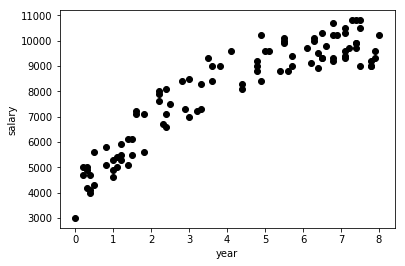

In [32]:
% pylab inline
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
regr.coef_

array([712.59413615])

In [35]:
regr.intercept_

5049.009899813836

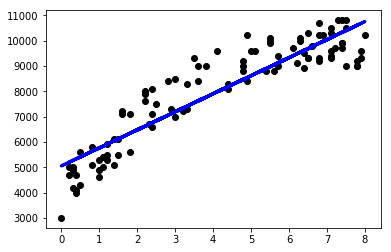

In [36]:
#regr.predict(X)
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()


In [37]:
import numpy as np
regr.predict(np.array([[10], [20]]))

array([12174.95126127, 19300.89262272])

In [38]:
regr.coef_ * 10 + regr.intercept_

array([12174.95126127])

### 二項式回歸

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
#plt.scatter(X, Y, color='black')
#plt.plot(X_, regr.predict(X_), linewidth =   3, color="blue")

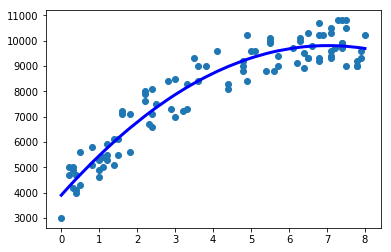

In [54]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X['year'],Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

In [57]:
X3 = poly_reg.fit_transform(np.array([[10],[20]]))

In [59]:
regr.predict(X3)

array([  8738.39978441, -10361.05676572])

### 三項式回歸

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=3)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

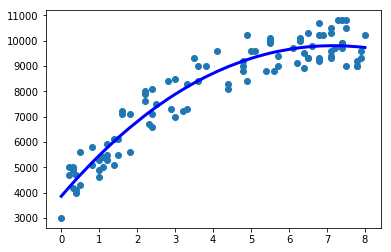

In [61]:
X3  = X.sort_values('year')
X3_ = poly_reg.fit_transform(X3)

plt.scatter(X['year'],Y)
plt.plot(X3, regr.predict(X3_), color = 'blue', linewidth = 3)
plt.show()

In [62]:
N = poly_reg.fit_transform(np.array([[10],[20]]))

In [63]:
regr.predict(N)

array([ 9001.25190157, -3639.8237898 ])

In [65]:
regr.coef_

array([ 0.00000000e+00,  1.74677597e+03, -1.40368592e+02,  1.71453462e+00])

## 多元線性回歸

In [66]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')

In [69]:
Neighborhood = pandas.get_dummies(df['Neighborhood'])

In [72]:
Brick = pandas.get_dummies(df['Brick'])

In [74]:
df = pandas.concat([df, Brick, Neighborhood], axis = 1)

In [76]:
del df['Brick']
del df['Neighborhood']

In [78]:
del df['Home']

In [80]:
del df['No']
del df['West']

In [82]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [83]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()


In [87]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms','Offers', 'Yes', 'East','North']]
Y = df['Price'].values

In [88]:
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
regr.coef_

array([    52.99374081,   4246.79389165,   7883.27849293,  -8267.48831831,
        17297.34952752, -22241.61647014, -20681.03735068])

In [90]:
#regr.predict(X)

In [91]:
import statsmodels.api as sm
X2  = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           8.25e-50
Time:                        11:28:56   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [96]:
predictorcols = list(X.columns)

In [100]:
import itertools
for variables in itertools.combinations(predictorcols, 4):
    print(variables)

('SqFt', 'Bedrooms', 'Bathrooms', 'Offers')
('SqFt', 'Bedrooms', 'Bathrooms', 'Yes')
('SqFt', 'Bedrooms', 'Bathrooms', 'East')
('SqFt', 'Bedrooms', 'Bathrooms', 'North')
('SqFt', 'Bedrooms', 'Offers', 'Yes')
('SqFt', 'Bedrooms', 'Offers', 'East')
('SqFt', 'Bedrooms', 'Offers', 'North')
('SqFt', 'Bedrooms', 'Yes', 'East')
('SqFt', 'Bedrooms', 'Yes', 'North')
('SqFt', 'Bedrooms', 'East', 'North')
('SqFt', 'Bathrooms', 'Offers', 'Yes')
('SqFt', 'Bathrooms', 'Offers', 'East')
('SqFt', 'Bathrooms', 'Offers', 'North')
('SqFt', 'Bathrooms', 'Yes', 'East')
('SqFt', 'Bathrooms', 'Yes', 'North')
('SqFt', 'Bathrooms', 'East', 'North')
('SqFt', 'Offers', 'Yes', 'East')
('SqFt', 'Offers', 'Yes', 'North')
('SqFt', 'Offers', 'East', 'North')
('SqFt', 'Yes', 'East', 'North')
('Bedrooms', 'Bathrooms', 'Offers', 'Yes')
('Bedrooms', 'Bathrooms', 'Offers', 'East')
('Bedrooms', 'Bathrooms', 'Offers', 'North')
('Bedrooms', 'Bathrooms', 'Yes', 'East')
('Bedrooms', 'Bathrooms', 'Yes', 'North')
('Bedrooms', 'B

In [101]:
len(predictorcols)

7

In [104]:
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic
#AICs

In [105]:
from collections import Counter
c = Counter(AICs)

In [109]:
c.most_common()[::-1][0]

(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
 2729.3189814012494)

## 抓取591 資料

In [125]:
import requests

headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36' 
}
houseurl = 'https://sale.591.com.tw/home/search/list?type=2&&shType=list&section=5&regionid=1&shape=2&kind=9&firstRow={}&totalRows=1531'

houseary = []
for i in range(0,int(1531 / 30) + 1):
    res = requests.get(houseurl.format(i * 30), headers = headers)
    df = pandas.DataFrame(res.json()['data']['house_list'])
    houseary.append(df)
#res = requests.get()

In [126]:
housedf = pandas.concat(houseary)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [128]:
housedf.to_excel('20181013_591.xlsx')

In [129]:
housedf = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/20181013_591.xlsx')

In [132]:
housedf.iloc[1]

address                                                         仁愛路四段345巷
area                                                                49.25
browsenum                                                            3483
build_purpose                                                         NaN
call_num                                                              NaN
cartmodel                                                             NaN
carttype                                                              NaN
community_link                                                        NaN
community_name                                                       興雅別墅
company                                                               NaN
delivery                                                              NaN
down_price_percent                                                    NaN
fci_pai                                                               NaN
floor                                 

In [134]:
housedf = housedf[['area', 'price', 'floor', 'room', 'houseage']]

In [136]:
housedf.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
housedf[['current_floor', 'total_floor']] = housedf['floor'].str.extract('(\d+)F/(\d+)F')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [140]:
housedf[['bedroom','living_room', 'bathroom']] = housedf['room'].str.extract('(\d+)房(\d+)廳(\d+)衛')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [142]:
del housedf['floor']
del housedf['room']
housedf.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
housedf.head()

,area,price,houseage,current_floor,total_floor,bedroom,living_room,bathroom
1,49.25,4978,40,2,7,3,2,2
2,30.40,3550,6,6,9,3,2,2
3,50.43,4280,38,3,7,4,2,2
7,52.40,4588,32,6,6,7,6,6
8,30.88,2840,23,4,6,1,2,1


In [144]:
housedf.columns

Index(['area', 'price', 'houseage', 'current_floor', 'total_floor', 'bedroom',
       'living_room', 'bathroom'],
      dtype='object')

In [148]:
housedf['current_floor'] = housedf['current_floor'].astype(int)
housedf['total_floor'] = housedf['total_floor'].astype(int)
housedf['bedroom'] = housedf['bedroom'].astype(int)
housedf['living_room'] = housedf['living_room'].astype(int)
housedf['bathroom'] = housedf['bathroom'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [150]:
import statsmodels.api as sm
X = housedf[['area', 'houseage', 'current_floor', 'total_floor', 'bedroom',
       'living_room', 'bathroom']]
Y = housedf['price'].values
X2  = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1379.
Date:                Sat, 13 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:36:55   Log-Likelihood:                -12626.
No. Observations:                1455   AIC:                         2.527e+04
Df Residuals:                    1447   BIC:                         2.531e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -360.5493    176.264     -2.046

In [152]:
predictorcols = list(X.columns)

In [153]:
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic
#AICs

In [155]:
from collections import Counter
c = Counter(AICs)

In [156]:
c.most_common()[::-1][0]

(('area',
  'houseage',
  'current_floor',
  'total_floor',
  'bedroom',
  'living_room',
  'bathroom'),
 25268.913469670042)

## 分類模型

### 決策樹

In [158]:
from sklearn.datasets import load_iris
iris = load_iris()

In [162]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [165]:
print(iris.data[0:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [167]:
print(iris.target[0:3])

[0 0 0]


In [170]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [173]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [174]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [175]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree2.dot')

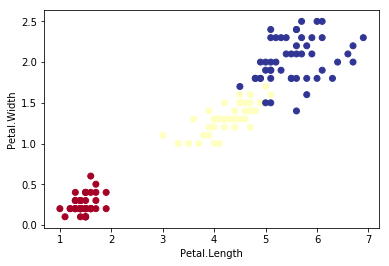

In [177]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, alpha=1, cmap = plt.cm.RdYlBu)
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [179]:
na = np.array([[5,3,2,1]])
clf.predict(na)

array([1])

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [207]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree3.dot')

In [199]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [200]:
x_min, x_max

(0.0, 7.9)

In [201]:
y_min, y_max

(-0.9, 3.5)

In [202]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

In [203]:
xx,yy

(array([[0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
        [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
        [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
        ...,
        [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
        [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
        [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8]]),
 array([[-0.9, -0.9, -0.9, ..., -0.9, -0.9, -0.9],
        [-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8],
        [-0.7, -0.7, -0.7, ..., -0.7, -0.7, -0.7],
        ...,
        [ 3.2,  3.2,  3.2, ...,  3.2,  3.2,  3.2],
        [ 3.3,  3.3,  3.3, ...,  3.3,  3.3,  3.3],
        [ 3.4,  3.4,  3.4, ...,  3.4,  3.4,  3.4]]))

In [204]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 2, 2, 2])

In [205]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

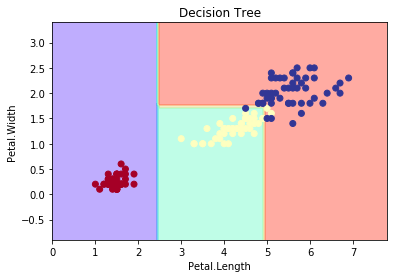

In [206]:
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)

plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [196]:
type(tree.DecisionTreeClassifier())

sklearn.tree.tree.DecisionTreeClassifier

In [210]:
?np.c_

In [209]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

### 邏輯式迴歸

In [211]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()

X = iris.data[:, [2,3]]
y = iris.target

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

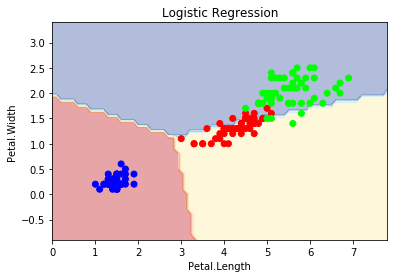

In [220]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


In [221]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]
clf1 = SVC(kernel="linear")
clf1.fit(X, y)
clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()


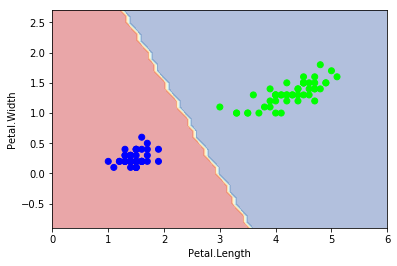

In [223]:
plot_estimator(clf1, X, y)

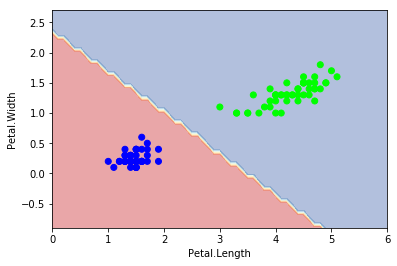

In [224]:
plot_estimator(clf2, X, y)

In [225]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])

X = data[:, :2]
Y = data[:,2]



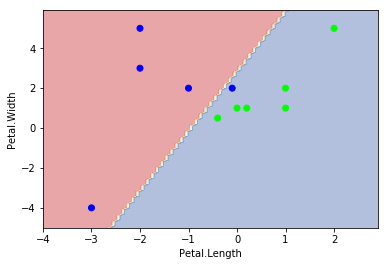

In [226]:
# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

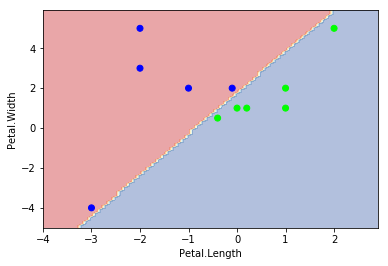

In [227]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [228]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [229]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

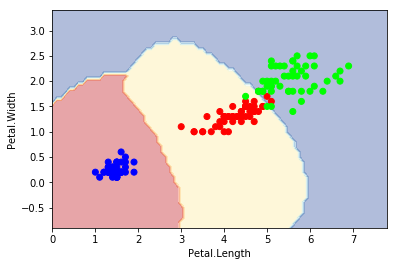

In [231]:
plot_estimator(clf1,X,y)

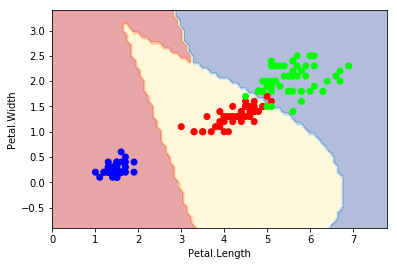

In [232]:
plot_estimator(clf2,X,y)

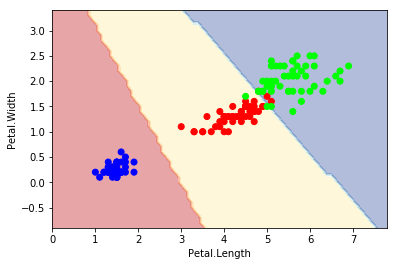

In [233]:
plot_estimator(clf3,X,y)

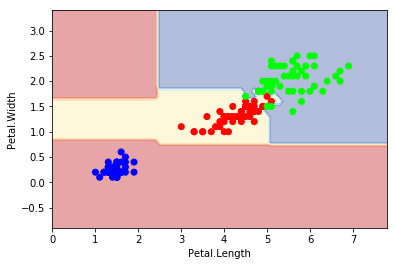

In [236]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

clf = RandomForestClassifier(n_estimators=100, criterion="entropy")

clf.fit(X, y)
plot_estimator(clf, X, y)

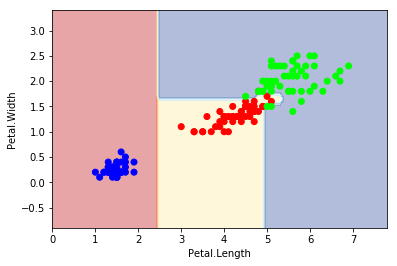

In [237]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

clf = RandomForestClassifier(n_estimators=1, criterion="entropy")

clf.fit(X, y)
plot_estimator(clf, X, y)

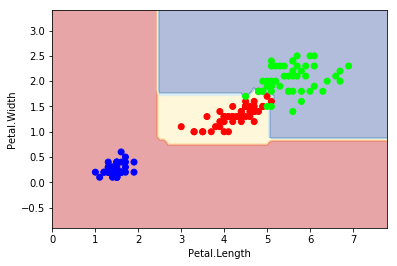

In [239]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

clf = RandomForestClassifier(n_estimators=10, criterion="entropy")

clf.fit(X, y)
plot_estimator(clf, X, y)

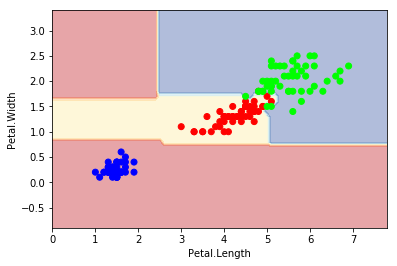

In [240]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

clf = RandomForestClassifier(n_estimators=1000, criterion="entropy")

clf.fit(X, y)
plot_estimator(clf, X, y)

In [241]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = DecisionTreeClassifier()
clf2.fit(X, y)

clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf3.fit(X, y)

clf4 = LogisticRegression()
clf4.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

SVM


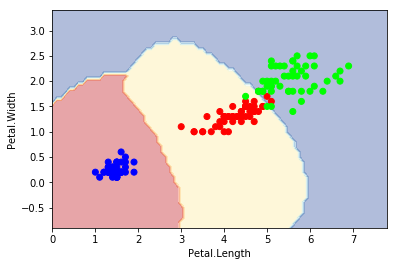

In [243]:
print('SVM')
plot_estimator(clf1, X, y)

Decision Tree


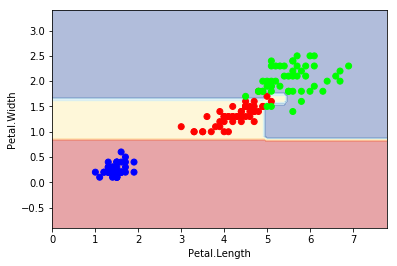

In [244]:
print('Decision Tree')
plot_estimator(clf2, X, y)

RandomForestClassifier


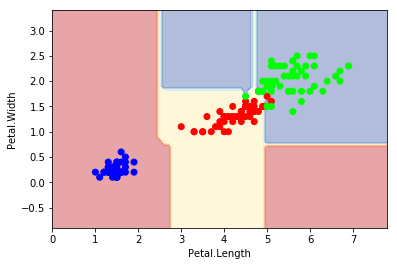

In [245]:
print('RandomForestClassifier')
plot_estimator(clf3, X, y)

LogisticRegression


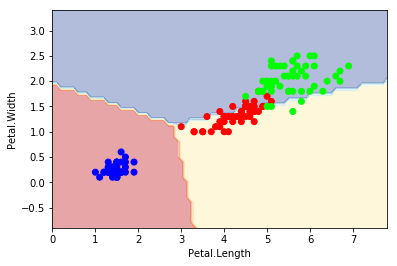

In [246]:
print('LogisticRegression')
plot_estimator(clf4, X, y)

In [248]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
digits = load_digits()

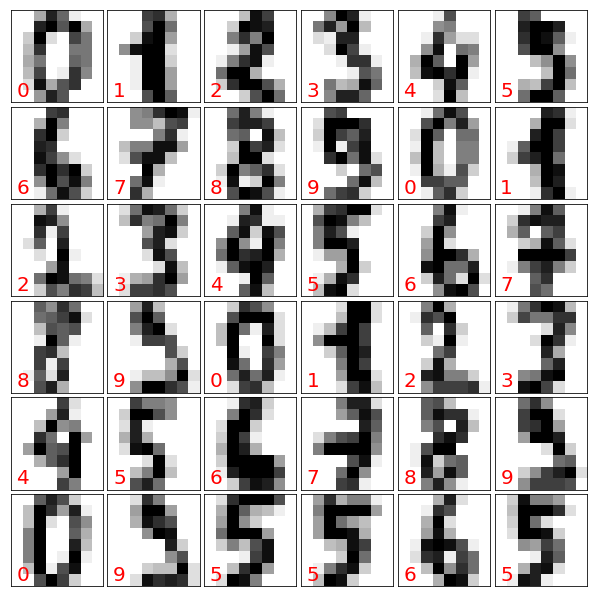

In [249]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)


In [251]:
digits.data.shape

(1797, 64)

In [253]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [254]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [255]:
scaler = StandardScaler()
scaler.fit(digits.data)

X_scaled = scaler.transform(digits.data)

In [257]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [259]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [260]:
?MLPClassifier

In [266]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 1000)

mlp.fit(X_scaled , digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [267]:
predicted = mlp.predict(X_scaled)

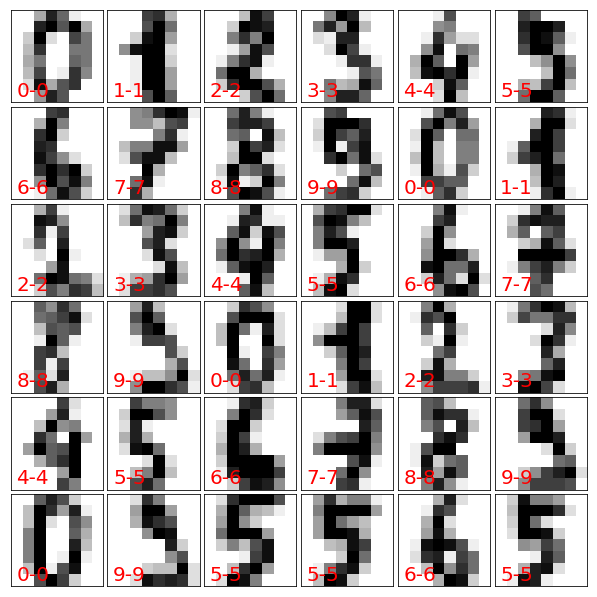

In [268]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)


In [269]:
sum(predicted == digits.target) / len(digits.target)

1.0